# Activity 0.1. Getting Started with `numpy`
(last modified 27 Feb 2023)

### Learning Outcomes

In this activity we practice how to

- create arrays objects in various ways including sampling random data with `numpy.random`
- apply operations to arrays
- select parts of an array via indexing
- draw scatter plots `matplotlib`

### Prerequisites

- Python set up on your system to run Jupyter Notebooks and the libraries installed that are specified in `requirements.txt`
- A first look at the numpy [tutorial](https://numpy.org/devdocs/user/absolute_beginners.html) (but we will point to relevant parts of the tutorials as we go)

## Introduction

In this unit we are mainly going to work with the following Python libraries:
1. `numpy` for numerical computations
2. `scipy` for some advanced scientific computing methods (not often)
3. `matplotlib` for plotting data
4. `scikit-learn` for machine learning tools

These libraries build on each other (in the order listed) and the first three are often jointly referred to as "the scipy-stack". Those three are very important in the professional and academic practice of Python programming with `numpy` being the fundamental basis for writing efficient Python code. 

In this activity, we review the most important programming concepts with `numpy`.


## Basic Array Creation, Shape, and Data Type



The most central concepts of `numpy` are `array` objects, which represent a regular grid of values with some common type and an index structure to access those values ([what is an array](https://numpy.org/devdocs/user/absolute_beginners.html#what-is-an-array)).

#### Task A: Create some Arrays 

**Work through [how to create a basic array](https://numpy.org/devdocs/user/absolute_beginners.html#how-to-create-a-basic-array) by trying out code in the cell below we already added the line to import the `numpy` module into our namespace. This is typically done by the following line, which makes all numpy types and functions available with the prefix `np`.**

In [1]:
import numpy as np

You should now be familiar with the most elementary way to create a `numpy` array, i.e., via calling `numpy.array` directly with a nested Python iterable that describes the data of the array as in the following two examples.

In [2]:
np.array([3, 1, 5])

array([3, 1, 5])

In [3]:
np.array([[3, 1, 5], 
          [1, 9, 2]])

array([[3, 1, 5],
       [1, 9, 2]])

Some other important ways to arrays are the functions

- `arange` that creates arrays with consecutve integers (similar to the Python built-in function `range`)
- `zeros` that creates an array with all zero-entries of the specified type and shape
- `ones` that creats an array with all one-entries of the specified type and shape
- `eye` which creates an array representing the unit matrix of desired dimensionality `p`, i.e., an array of shape `(p, p)` with `1`-entries on the diagonal and `0`-entries elsewhere. Also here the type can be varied.

In [4]:
np.arange(8)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [5]:
np.zeros(4)

array([0., 0., 0., 0.])

In [6]:
np.zeros(shape=(5, 2), dtype=bool)

array([[False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False]])

In [7]:
np.ones(6)

array([1., 1., 1., 1., 1., 1.])

In [8]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [9]:
np.eye(3, dtype=int)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

## Generating Random Data

To test machine learning methods we will often generate some random data. A random number can be created with `numpy` via the function `numpy.random.default_rng` as in the cell below. We typically prodive a random seed in our activities to make the output of the subsequent cells deterministic/reproducible.

In [10]:
RNG = np.random.default_rng(seed=0)
RNG.random()

0.6369616873214543

Besides the basic `random`-method, a random number generator has a number of much more convenient methods to generate random outcomes for different use cases.

One important one is the `choice`-method, which generates a random selection of non-negative integers up to a maximum number (exclusive). The keyword argument `replace` determines whether this selection is sampled with our witout replacement.

In [11]:
RNG.choice(10, size=10)

array([5, 2, 3, 0, 0, 0, 1, 8, 6, 9])

In [12]:
RNG.choice(10, size=10, replace=False)

array([3, 1, 4, 7, 9, 5, 2, 0, 6, 8])

Another important random number generator method is [`multivariate_normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html), which can be used to sample data from a [multivariate normal distribtion](https://en.wikipedia.org/wiki/Multivariate_normal_distribution).

### Task B: Sample from Multivariate Normal

**Complete the line below to sample 20 data points from a 2-dimensional multivariate normal distribution with the following mean vector and covariance matrix:**

\begin{equation*}
\boldsymbol{\mu} =
\begin{pmatrix}
0\\
0
\end{pmatrix}
\qquad
\boldsymbol{\Sigma} =
\begin{pmatrix}
1.0 & 0.7\\
0.7 & 1.0
\end{pmatrix}
\end{equation*}

In [13]:

cov = np.array([[1.0, 0.7], [0.7, 1.0]])
x = RNG.multivariate_normal(mean=np.zeros(2), cov=cov, size=20)
x

array([[ 0.88590774,  0.46432655],
       [ 0.13219051,  0.45103816],
       [-0.91136857, -1.0109311 ],
       [-1.00218828, -1.51744586],
       [-0.67398877,  0.02583622],
       [ 0.20128097, -0.37463108],
       [ 1.02706526,  0.67251236],
       [ 0.18801357, -0.59403331],
       [ 0.25451793,  0.13118277],
       [-0.58177211, -0.41549787],
       [-0.07441072, -0.58086418],
       [-0.18413453,  0.42313026],
       [-0.8892415 , -1.86450947],
       [-1.91702406, -0.87451344],
       [-0.82275674, -0.61791029],
       [-0.27526645,  0.85411152],
       [-2.50503905, -1.10949868],
       [-1.3508786 , -1.07405292],
       [ 1.11573981,  1.11228966],
       [-0.10625974, -1.10422023]])

## Selecting Portions of an Array

Once we have an array at hand, we can manipulate it various ways, most importantly via [indexing and slicing](https://numpy.org/devdocs/user/absolute_beginners.html#indexing-and-slicing).

#### Task C: Select Columns

**Refer to the above section of the tutorial to select the two individual columns of our `x`-array and store them into the variables `x0` and `x1`.**

Once you have completed the code below you can run it to plot the `x`-array in a scatter plot with `matplotlib`.

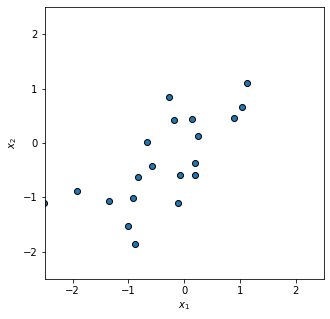

In [14]:
from matplotlib import pyplot as plt

plt.figure(figsize=(5, 5))
x0 = x[:, 0]
x1 = x[:, 1]
plt.scatter(x0, x1, edgecolors='black')
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

You might have already discovered that you can use binary operations like `+`, `-`, and so on on arrays with matching dimensionality to create new arrays (resulting from carrying out the operation element-wise).

For example:

In [15]:
np.array([1, 2, 3]) + np.array([4, 5, 6])

array([5, 7, 9])

In [16]:
np.array([1, 2, 3]) * np.array([4, 5, 6])

array([ 4, 10, 18])

Interestingly, we can also combine operands of different shape. There are relatively complex rules for the validity of such expressions (the keyword here is [broadcasting](https://numpy.org/devdocs/user/absolute_beginners.html#broadcasting)), but in the simplest and most important case, we use a single value as one of the operands, which is then conceptually replicated to create an array that matches the shape of the other operand.

For example:

In [17]:
np.array([2, 3, 4]) + 5

array([7, 8, 9])

In [18]:
np.eye(3) + 1

array([[2., 1., 1.],
       [1., 2., 1.],
       [1., 1., 2.]])

In [19]:
-1*np.arange(4)

array([ 0, -1, -2, -3])

Importantly, this extends to logical operators. For instance, in the next cell we are creating a boolean array that contains true at all positions where the other operand has an entry of at least `4`.

In [20]:
np.arange(8) >= 4

array([False, False, False, False,  True,  True,  True,  True])

In [21]:
(np.arange(12) % 3) == 0

array([ True, False, False,  True, False, False,  True, False, False,
        True, False, False])

With the logical "and" and "or" operators, `&` and `|`, we can use this concept to describe the results of complex Boolean conditions.

#### Task D: Complex Boolean Expression

**Write an expression that creates a Boolean numpy array with `True`-entries where the index is greater than $3$ and divisible by $2$ (and `False`) otherwise.**

In [22]:
(np.arange(8) > 3) & (np.arange(8) % 2 == 0)

array([False, False, False, False,  True, False,  True, False])

Finally, we can combine these Boolean expressions with indexing to select portions of arrays that satisfy certain conditions.

For instance below we select all columns of a matrix where the entry on row 1 is greater than the entry in row 0.

In [23]:
a = np.array([[3, 2, 5], [1, 4, 6]])
a

array([[3, 2, 5],
       [1, 4, 6]])

In [24]:
a[:, a[1, :] > a[0, :]]

array([[2, 5],
       [4, 6]])

### Task E: Select Data from Specific Quadrant

**Complete the code below to plot in a different color the part of our previously generated data that is in the fourth quadrant, i.e., where $x_0 < 0$ and $x_1>0$.**

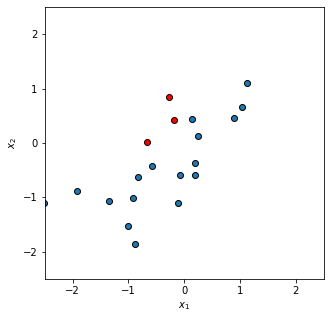

In [25]:
selected = (x[:, 0] < 0) & (x[:, 1] > 0)
plt.figure(figsize=(5, 5))
plt.scatter(x[~selected, 0], x[~selected, 1], edgecolors='black')
plt.scatter(x[selected, 0], x[selected, 1], color='red', edgecolors='black')
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

## Vectorised Computations

The main advantage of `numpy` is that it allows us to specify "vectorised" computations, i.e., instead of computing results element by element by an explicit Python-loop, we can specify the desired outcome as vector operation. This usually results in a tremendous speed-up.

To illustrate, let us consider the problem of computing the vector with maximum norm from a sample of multi-variate normal random vectors.

In [26]:
x_large = RNG.multivariate_normal(mean=np.zeros(20), cov=np.eye(20), size=1000)
x_large

array([[ 0.39512206,  0.42986369,  0.69604272, ...,  1.00396158,
        -0.61790704,  1.82201136],
       [-1.32043097, -0.66152802,  0.93504999, ..., -0.43278585,
        -0.73548329,  0.24978537],
       [ 1.03145308,  0.16100958, -0.58552882, ..., -0.07570153,
         0.2021144 ,  0.69417194],
       ...,
       [-0.89865222, -0.11607746, -1.31834691, ...,  0.08384801,
        -0.33206482, -0.39486074],
       [ 0.22691045,  0.34131217,  0.57444459, ...,  0.57041153,
         0.20591619,  0.35066407],
       [ 0.3492841 ,  0.35742917,  0.82431228, ..., -0.50484404,
         1.40517152,  1.50986329]])

Naively, we can find the norm of all rows as follows.

In [27]:
def norms_naive(x):
    n, p = x.shape
    res = np.zeros(n)
    for i in range(n):
        for j in range(p):
            res[i] += x[i, j]**2
        res[i] = res[i]**0.5
    return res

norms1 = norms_naive(x_large)
norms1


array([4.72838497, 4.43340805, 4.12263609, 3.96071222, 4.3362351 ,
       4.66099305, 4.28035372, 4.49746586, 5.32185485, 5.76640611,
       5.00669107, 4.6866112 , 4.88995765, 2.84587981, 4.89517419,
       3.9992744 , 3.49094277, 5.21616845, 4.58663257, 4.04807267,
       4.77855678, 5.29719603, 4.02082984, 4.83381844, 3.80665239,
       3.8895217 , 3.66475734, 4.26595426, 5.13446435, 4.41532823,
       4.31194744, 4.41610216, 3.85196199, 4.21494267, 5.12498678,
       4.82171402, 4.68288866, 3.26423677, 2.993208  , 3.43257314,
       3.698656  , 3.00967212, 4.07732073, 4.11608697, 4.84279232,
       4.34109871, 4.82007089, 3.56065096, 3.91073187, 5.06055513,
       5.5365354 , 5.46217773, 4.16558625, 3.40726667, 3.56146527,
       4.66864579, 4.30684521, 4.02125676, 4.7482965 , 4.93597865,
       4.84543735, 4.68715223, 4.23285931, 4.54171753, 5.16240161,
       5.12115728, 4.95272172, 4.35467544, 4.61508882, 4.1345453 ,
       4.95512679, 3.18843911, 3.84618512, 4.23263716, 3.56930

In [28]:
time1 = %timeit -o norms_naive(x_large)
time1.average

12.8 ms ± 506 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


0.012840326651428568

#### Task F: Vectorise Norm Computation

**Write a single expression that computes the norms of all rows of `x_large`.**

Hint: Decompose the problem into three parts

1. Compute a matrix that contains all the entries of `x_large` squared
2. Compute a vector that contains all *row*-sums of the previous matrix (see [sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) to learn how to sum along columns with the `axis`-parameter)
3. Compute the element-wise square-root of all entries of the vector computed in step 2

In [29]:
norms2 = (x_large**2).sum(axis=1)**0.5
np.allclose(norms1, norms2)

True

In [30]:
time2 = %timeit -o (x_large**2).sum(axis=1)**0.5
time2.average

42.8 µs ± 2.86 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


4.28372903714286e-05

Let us see how much slower the naive version is than the vectorised version to understand how crucial vectorisation is for efficient Python code:

In [31]:
time1.average/time2.average

299.7464718261626

Having computed all the norms, we can plot a histogram of them.

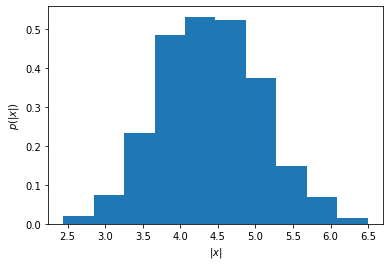

In [32]:
plt.hist(norms1, density=True)
plt.xlabel('$\|x\|$')
plt.ylabel('$p(\|x\|)$')
plt.show()

We see that the maximum norm has a value of around 7. We can use the following `numpy` functions to efficiently (i.e., without explicit Python loop) find the maximum value and the corresponding index of an array.

In [33]:
np.max(norms1)

6.493401240957444

In [34]:
np.argmax(norms1)

826